In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import warnings
warnings.filterwarnings('ignore')


In [16]:
#loading the dataset to be worked upon
df = pd.read_csv("movies.csv")
df.head(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [17]:
pip install wordcloud

^C
Note: you may need to restart the kernel to use updated packages.


In [18]:
df.info

<bound method DataFrame.info of                                   Film    Genre            Lead Studio  \
0           Zack and Miri Make a Porno  Romance  The Weinstein Company   
1                      Youth in Revolt   Comedy  The Weinstein Company   
2   You Will Meet a Tall Dark Stranger   Comedy            Independent   
3                         When in Rome   Comedy                 Disney   
4                What Happens in Vegas   Comedy                    Fox   
..                                 ...      ...                    ...   
72                 Across the Universe  romance            Independent   
73                       A Serious Man    Drama              Universal   
74                  A Dangerous Method    Drama            Independent   
75                          27 Dresses   Comedy                    Fox   
76                (500) Days of Summer   comedy                    Fox   

    Audience score %  Profitability  Rotten Tomatoes % Worldwide Gross  Year  


In [19]:
#checking for null values
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

### the dataset contains no null values

In [20]:
df.drop_duplicates(subset=['Film'], inplace=True)

In [21]:
df.drop_duplicates(subset=['Genre'], inplace=True)

In [22]:
df.drop_duplicates(subset=['Lead Studio'], inplace=True)

In [23]:
def combine_text(row):
    text = ''
    for column in ['Film', 'Genre','Lead Studio']: 
        text += ' ' + str(row[column])
    return text


In [24]:
df['combined_text'] = df.apply(combine_text, axis=1)

In [28]:
# Tokenize the text
import nltk
nltk.download('punkt')
all_plots = ' '.join(df['combined_text'])
tokens = word_tokenize(all_plots)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Remove stopwords and punctuation
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in punctuation]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [31]:
word_freq = Counter(filtered_tokens)

In [32]:
# Extract the most common keywords
num_keywords = 10  # Number of keywords to extract
most_common_keywords = word_freq.most_common(num_keywords)

In [34]:
print("Most common keywords:")
for keyword, frequency in most_common_keywords:
    print(f"{keyword}: {frequency}")

Most common keywords:
romance: 2
fox: 2
zack: 1
miri: 1
make: 1
porno: 1
weinstein: 1
company: 1
water: 1
elephants: 1


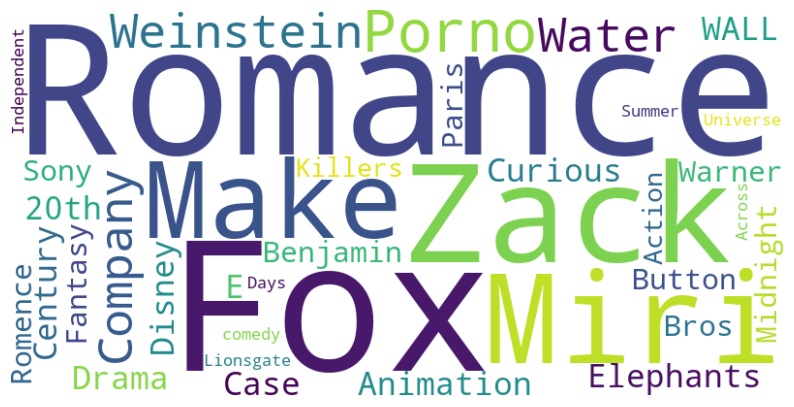

In [35]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_plots)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()